In [147]:
# Import packages
from __future__  import print_function, division
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
matplotlib.style.use('ggplot')

import matplotlib.pyplot as plt

%matplotlib inline

In [148]:
# Get data
str_url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"
str_common = "pinc"
dict_gender = {'male':'08_2_1_', 'female':'08_3_1_'}
str_exten = ".xls"
dict_keys = {'all':'1', 'white':'4', 'black':'6', 'hispanic':'8', 'asian':'9'}

# Create two dict for male and female
allmales = {}
allfemales = {}
for m,n in dict_gender.iteritems():
    for i,j in dict_keys.iteritems():
        url = str_url + str_common + n + j + str_exten
        if m == dict_gender.keys()[0]:
            allmales[i] = pd.read_excel(url, header=9)
        if m == dict_gender.keys()[1]:
            allfemales[i] = pd.read_excel(url, header=9)

In [149]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [150]:
allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [151]:
# just run this cell to get an idea of the data
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### hispanic
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean          809.478261            150.347826         42.413043   
std          1476.967354            439.113765         59.593652   
min             2.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max          5648.000000           2178.000000        224.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean          53.934783         59.434783           56.717391   
std           82.427989         95.528623           93.491215   
min            0.000000          0.000000            0.000000   
25%                 NaN               NaN      

In [152]:
# Use 'Characteristic' column as dataframe index
for i in [allfemales, allmales]:
    for j in i.itervalues():
        j.set_index('Characteristic', inplace=True)

In [153]:
# Convert nonnumeric values to nan
allfemales['all'] = allfemales['all'].apply(pd.to_numeric, errors='coerce')
allfemales['hispanic'] = allfemales['hispanic'].apply(pd.to_numeric, errors='coerce')
allfemales['white'] = allfemales['white'].apply(pd.to_numeric, errors='coerce')
allfemales['black'] = allfemales['black'].apply(pd.to_numeric, errors='coerce')
allfemales['asian'] = allfemales['asian'].apply(pd.to_numeric, errors='coerce')

allmales['all'] = allmales['all'].apply(pd.to_numeric, errors='coerce')
allmales['hispanic'] = allmales['hispanic'].apply(pd.to_numeric, errors='coerce')
allmales['white'] = allmales['white'].apply(pd.to_numeric, errors='coerce')
allmales['black'] = allmales['black'].apply(pd.to_numeric, errors='coerce')
allmales['asian'] = allmales['asian'].apply(pd.to_numeric, errors='coerce')

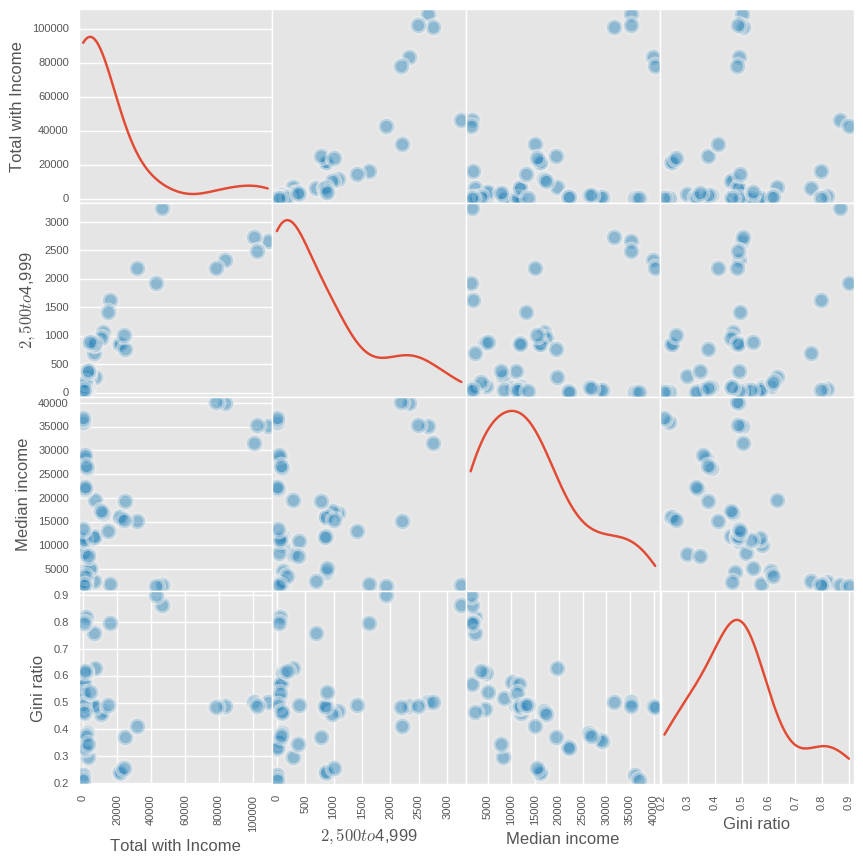

In [173]:
# use scatter_matrix to plot for all males
fig1 = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(10,10), 
                        diagonal='kde') 

# Figure 1: Scatter Matrix of Total Income, USD 2,500 to USD 4,999, Median Income and Gini Ratio for Male

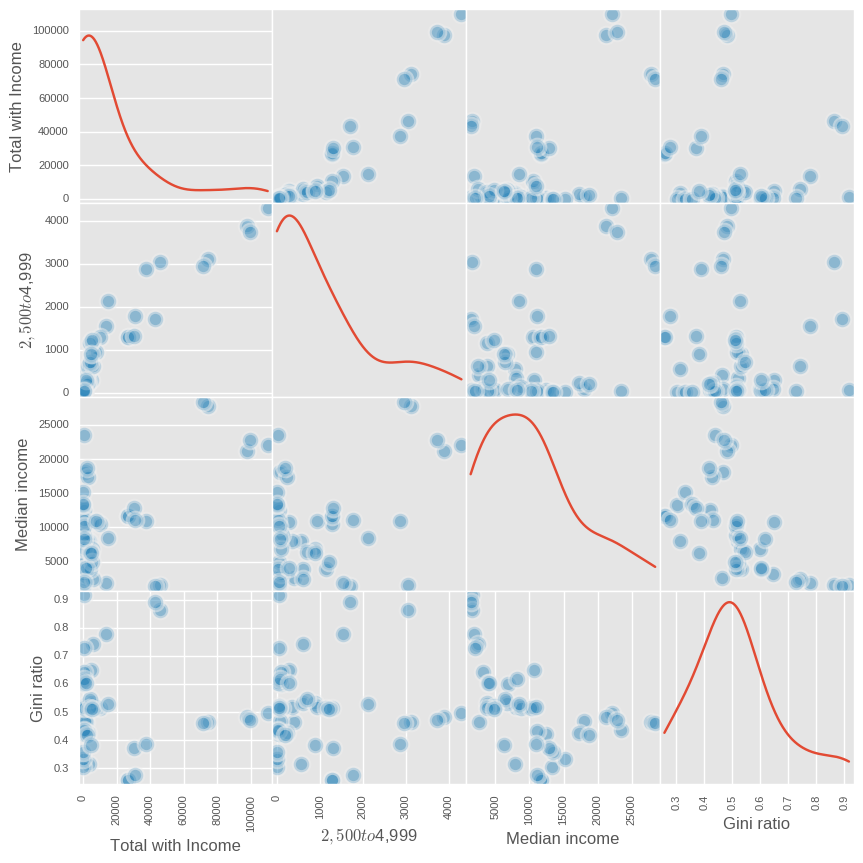

In [155]:
# use scatter_matrix to plot for all females
fig2 = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(10,10), 
                        diagonal='kde') 

# Figure 2: Scatter Matrix of Total Income, USD 2,500 to USD 4,999, Median Income and Gini Ratio for Female

In [347]:
# Create a dataframe with total median incomes by gender, race by race.
median_income = pd.DataFrame()

for i in [allmales]:
    for key, value in i.iteritems():
        median_income.set_value(key, 'male', value[u'Median income'][1])

for i in [allfemales]:
    for key, value in i.iteritems():
        median_income.set_value(key, 'female', value[u'Median income'][1])

In [254]:
print(median_income)

             male   female
hispanic  40153.0  24840.0
all       35228.0  22063.0
black     24855.0  20044.0
white     40122.0  23780.0
asian     25411.0  17762.0


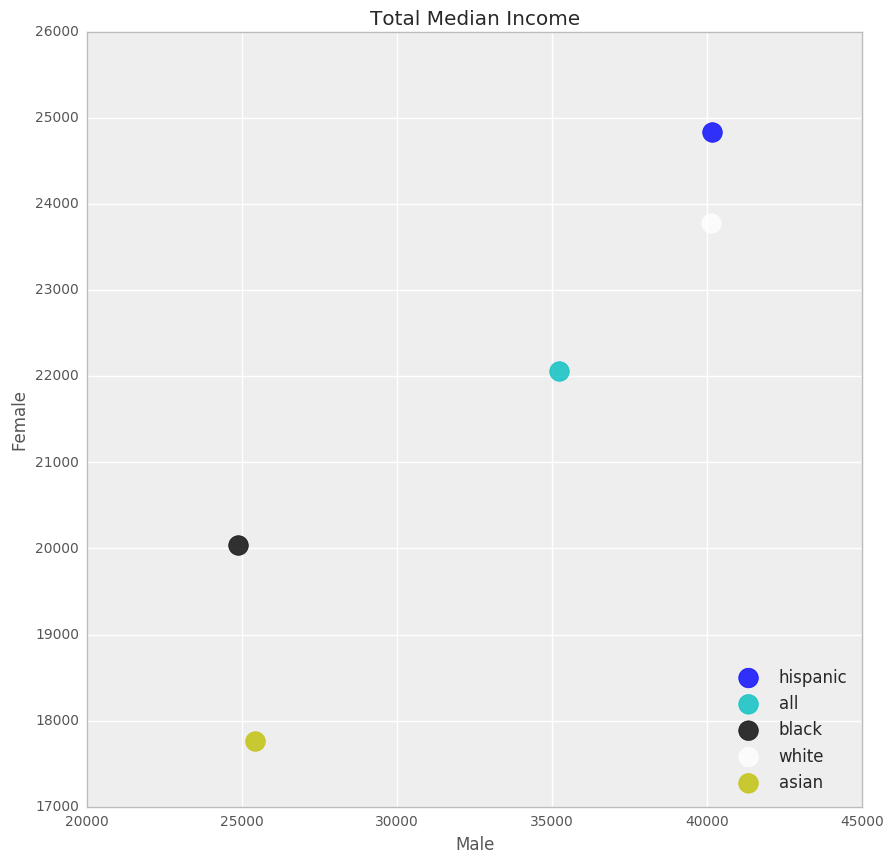

In [264]:
# Plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males, 
# race by race (one data point per race)
fig3 = plt.figure(figsize=(10,10))
colors = ['b', 'c', 'k', 'w', 'y']
for i in range(len(median_income.index)):
    plt.scatter(median_income['male'][i], median_income['female'][i], color=colors[i], s=200, alpha=0.8)
plt.legend(median_income.index,
           scatterpoints=1,
           loc='lower right',
           fontsize=12)
plt.title('Total Median Income')
plt.xlabel('Male')
plt.ylabel('Female')
plt.show()

# Figure 3: Female Total Median Income VS Male Total Median Income by Races

In [263]:
# Linear fit with scipy stats lingress function
slope, intercept, r_value, p_value, std_err = stats.linregress(x=median_income)

In [266]:
# Define linear equation to use the fit results
linfit = lambda x, slope, intercept: slope*x + intercept

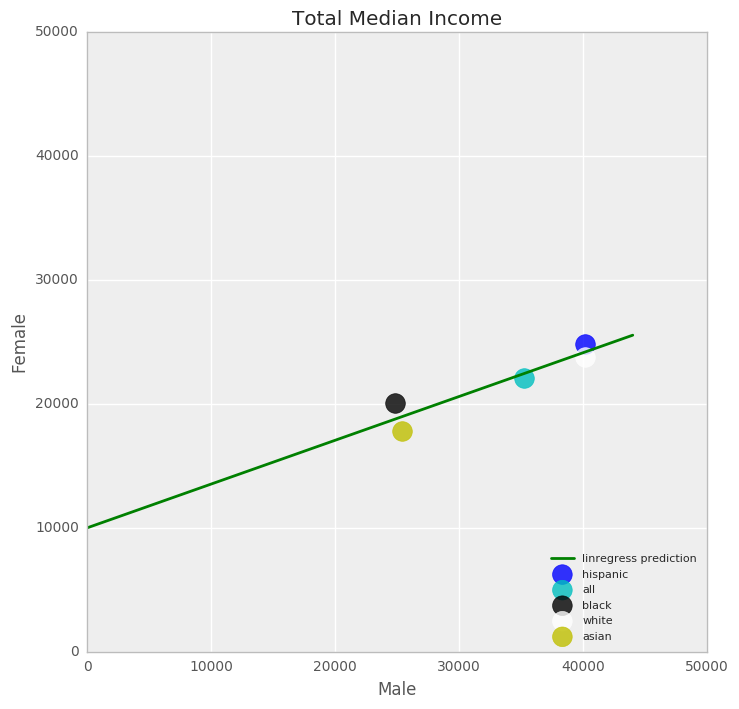

In [337]:
# Plot the fit line with scatters
fig4 = plt.figure(figsize=(8,8))
colors = ['b', 'c', 'k', 'w', 'y']
for i in range(len(median_income.index)):
    plt.scatter(median_income['male'][i], median_income['female'][i], color=colors[i], s=200, alpha=0.8)
plt.plot(np.arange(0,45000,1000), linfit(np.arange(0,45000,1000), slope, intercept), linewidth = 2, color='green')
plt.legend(['linregress prediction']+list(median_income.index),
           scatterpoints=1,
           loc='lower right',
           fontsize=8)
plt.title('Total Median Income')
plt.xlabel('Male')
plt.ylabel('Female')
plt.xlim([0,50000])
plt.ylim([0,50000])
plt.show()

# Figure 4: Linear Regression Result of Male to Female Total Median Income by Races

In [328]:
# Use the analytical solution for ordinary linear regression method
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

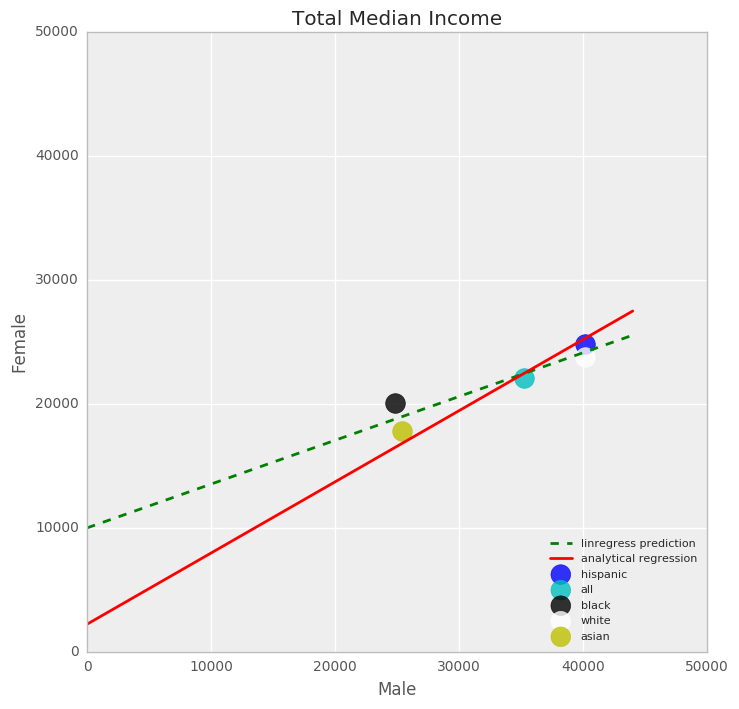

In [338]:
# Plot to add the analytical solution line
fig5 = plt.figure(figsize=(8,8))
colors = ['b', 'c', 'k', 'w', 'y']
for i in range(len(median_income.index)):
    plt.scatter(median_income['male'][i], median_income['female'][i], color=colors[i], s=200, alpha=0.8)
plt.plot(np.arange(0,45000,1000), linfit(np.arange(0,45000,1000), slope, intercept), linewidth = 2, 
         color='green', linestyle='--')
plt.plot(np.arange(0,45000,1000), linfit(np.arange(0,45000,1000), beta1, beta0), linewidth = 2, color='red')
plt.legend(['linregress prediction']+['analytical regression']+list(median_income.index),
           scatterpoints=1,
           loc='lower right',
           fontsize=8)
plt.title('Total Median Income')
plt.xlabel('Male')
plt.ylabel('Female')
plt.xlim([0,50000])
plt.ylim([0,50000])
plt.show()

# Figure 5: Comparison of Numerical and Analytical Linear Regression Method

In [403]:
# Create a dataframe with total median incomes by gender, race by race.
allmale_median_income = pd.DataFrame()
for i in [allmales]:
    for value in i.itervalues():
        allmale_median_income = allmale_median_income.append(pd.DataFrame(value[u'Median income']))
allmale_median_income.rename(columns={'Median income': 'male'}, inplace=True)
        
allfemale_median_income = pd.DataFrame()
for i in [allfemales]:
    for value in i.itervalues():
        allfemale_median_income = allfemale_median_income.append(pd.DataFrame(value[u'Median income']))
allfemale_median_income.rename(columns={'Median income': 'female'}, inplace=True)

# Combine into a single dataframe
all_median_income = pd.concat([allmale_median_income, allfemale_median_income], axis=1, join='inner')

In [404]:
all_median_income.head()

,male,female
Characteristic,,
NaN,NaN,NaN
....Total,40153.0,24840.0
Earnings,45926.0,31363.0
..Wages and Salary,45950.0,31802.0
..Nonfarm Self-Employment,30916.0,15231.0


In [405]:
# Drop rows with any NaNs.
all_median_income.dropna(inplace=True)

In [406]:
all_median_income.head()

,male,female
Characteristic,,
....Total,40153.0,24840.0
Earnings,45926.0,31363.0
..Wages and Salary,45950.0,31802.0
..Nonfarm Self-Employment,30916.0,15231.0
Social Security,15120.0,10710.0


In [413]:
# Linear regression fit using all sources of median income (numerical)
slope_all, intercept_all, r_value_all, p_value_all, std_err_all = stats.linregress(x=all_median_income)

In [420]:
# Analytical solution fit
all_median_males=np.array([0] + list(all_median_income['male']))
all_median_females=np.array([0] + list(all_median_income['female']))
cor_all = stats.spearmanr(all_median_males, all_median_females)
beta1_all = cor_all[0] * all_median_females.std() / all_median_males.std()
beta0_all = all_median_females.mean() - beta1_all * all_median_males.mean()
beta0_all, beta1_all

(1270.9351153647985, 0.62339385549588766)

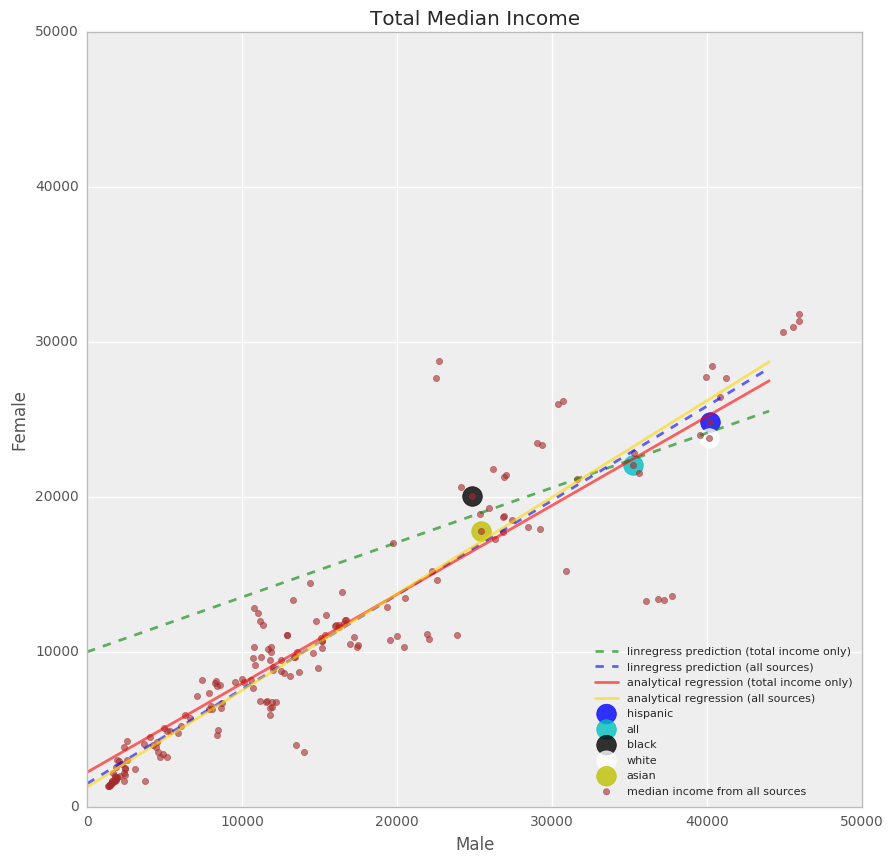

In [427]:
# Plot regression lines with scatter points
fig6 = plt.figure(figsize=(10,10))
colors = ['b', 'c', 'k', 'w', 'y']
plt.plot(np.arange(0,45000,1000), linfit(np.arange(0,45000,1000), slope, intercept), linewidth = 2, 
         color='green', linestyle='--', alpha=0.6)
plt.plot(np.arange(0,45000,1000), linfit(np.arange(0,45000,1000), slope_all, intercept_all), linewidth = 2, 
         color='blue', linestyle='--', alpha=0.6)
plt.plot(np.arange(0,45000,1000), linfit(np.arange(0,45000,1000), beta1, beta0), linewidth = 2, color='red', alpha=0.6)
plt.plot(np.arange(0,45000,1000), linfit(np.arange(0,45000,1000), beta1_all, beta0_all), linewidth = 2, color='gold', alpha=0.6)
for i in range(len(median_income.index)):
    plt.scatter(median_income['male'][i], median_income['female'][i], color=colors[i], s=200, alpha=0.8)
plt.scatter(all_median_income['male'], all_median_income['female'], color='brown', alpha=0.6)
plt.legend(['linregress prediction (total income only)']+['linregress prediction (all sources)']+
           ['analytical regression (total income only)']+['analytical regression (all sources)']+
           list(median_income.index)+['median income from all sources'],
           scatterpoints=1,
           loc='lower right',
           fontsize=8)
plt.title('Total Median Income')
plt.xlabel('Male')
plt.ylabel('Female')
plt.xlim([0,50000])
plt.ylim([0,50000])
plt.show()

# Figure 6: Linear Regression Fit for Female and Male Median Incomes

# Prediction: Assume a male receive a stipend of $60000

According to the analysis and visualization above, there is a difference between the linear regression between both numeric and analytical solutions, as well as between using total median incomes and using median incomes from all sources data. For prediction purposes, I will use the analytical linear regression method using median incomes from all sources.

In [431]:
print(beta1_all)

0.623393855496


From beta1_all, the predicted ols model suggests that on average females receive around 62% of males' stipends from same job positions.

In [430]:
# Predict using the gold line in Figure 6
male_stipend = 60000
predict_female_stipend = linfit(male_stipend, beta1_all, beta0_all)
print('Predicted Female Stipend: ' + '$' + str(predict_female_stipend))

Predicted Female Stipend: $38674.5664451


# Race Analysis
From previous analysis it can be found visually that the gender issue appears to be different among different races. From the perspective, I will continue the analysis above and conduct linear regression analysis for different races (unlike previously we are aggregate all races data together).
To analyze race differences among the data in general, I will first visualize the income distribution of different races. Besides, since there are four race groups in the data, it may be interesting to categorize their data accordingly and make some hypotheses regarding whether there are race differences. Then I will make a contigency table to challenge these hypotheses with categorical statistical tools such as Chi-square tests. 